In [39]:
import math
from logging import debug

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import copy
from math import sqrt,ceil
from scipy.stats import linregress
import libraries as lib

In [40]:
directory = "../../../OneDrive - HvA/Logfiles/SOLAR/2024/20240707_20240715_terugvaart/20240713_Huy-Limburg/0026 - 20240713T080342 14h37m16s 145.044km Durnal - Heel"
result1 = lib.DataUitzoekenGui(directory)

SelectMultiple(description='Bestanden:', options=('0_Bus.csv', '2_MPPT_0_05_05.csv', '3_MPPT_1_05_07.csv', '4_…

Button(button_style='success', description='Bestanden Laden', icon='check', style=ButtonStyle(), tooltip='Klik…

Label(value='')

In [41]:
# Na het laden van de bestanden en het klikken op de knop
# Controleer of 'merged_df' in result zit
if 'merged_df' in result1:
    merged_df = result1['merged_df'].copy()
    # Gebruik merged_df zoals je wilt
else:
    print("De data is nog niet geladen.")
merged_df

,1_Datalogger port,"1_Dataloggertijd, in s",1_Cycle count,1_Tijd,1_Latitude,1_Longitude,1_Snelheid over de grond in km/h,1_Richting van de snelheid,1_Datum,1_Magnetische directie,...,2_CRC errors detected (0),2_Unknown packets (0),2_Number of times more or fewer fields than expected in a packet (0),2_gps long,2_gps lat,2_gps direction,2_gps speed,2_gps time,2_Datalogger port,2_Format header (>20|02)
Indextijd,,,,,,,,,,,,,,,,,,,,,
0 days 00:02:19,9.0,139.0348,143.630,60343.0,5020.2014,459.8611,0.0,9.7,130724.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0 days 00:02:20,9.0,140.0466,144.642,60344.0,5020.2014,459.8611,0.0,9.7,130724.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0 days 00:02:21,9.0,141.0361,145.631,60345.0,5020.2014,459.8611,0.0,9.7,130724.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0 days 00:02:22,9.0,142.0393,146.635,60346.0,5020.2014,459.8611,0.0,9.7,130724.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0 days 00:02:23,9.0,143.0548,147.651,60347.0,5020.2014,459.8611,0.0,9.7,130724.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0 days 14:39:30,9.0,52770.1838,52782.637,204054.0,5110.7016,552.5635,0.0,286.3,130724.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0 days 14:39:31,9.0,52771.1616,52783.613,204055.0,5110.7016,552.5635,0.0,286.3,130724.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0 days 14:39:32,9.0,52772.2290,52784.684,204056.0,5110.7016,552.5635,0.0,286.3,130724.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [92]:
#filter de eerste 100 waarders erut
merged_df1 = merged_df.iloc[17500:-1200]
lib.plot_trajectory_map(merged_df1['1_Latitude'].dropna(), merged_df1['1_Longitude'].dropna(), merged_df1['1_Snelheid over de grond in km/h'].dropna())

In [ ]:
# Add the following filters
#motor toerental keer -1 om de juiste richting te krijgen
merged_df1['2_Current RPM of motor shaft (1/min)'] = merged_df1['2_Current RPM of motor shaft (1/min)']*-1

In [94]:
#bereken de twee vermogens met '2_VESC input voltage (V)', '2_VESC input current (A)'
merged_df1['2_VESC input vermogen (W)'] = merged_df1['2_VESC input voltage (V)']*merged_df1['2_VESC input current (A)']

#filter alles rpm onder de 0 eruit
merged_df1 = merged_df1[merged_df1['2_Current RPM of motor shaft (1/min)'] > 0]

#filter eruit de 0 vermogens
merged_df1 = merged_df1[merged_df1['2_VESC input vermogen (W)'] > 1]

#vermogen boven de 2500 eruit
merged_df1 = merged_df1[merged_df1['2_VESC input vermogen (W)'] < 2000]

#filter snelheid onder de 0 eruit
merged_df1 = merged_df1[merged_df1['1_Snelheid tenopzichte van het water in Kilometers per uur'] > 0]

#snelheid boven de 30 eruit
merged_df1 = merged_df1[merged_df1['1_Snelheid tenopzichte van het water in Kilometers per uur'] < 20]

#filter eruit alles acceleraties met .diff() die groter zijn dan 0.1
merged_df1 = merged_df1[merged_df1['1_Snelheid over de grond in km/h'].diff() < 0.1]

#acceleraties boven de -0.1 eruit
merged_df1 = merged_df1[merged_df1['1_Snelheid over de grond in km/h'].diff() > -0.1]

#kan je eruit filteren als de snelheidhoger is dan 10 en het vermogen lager dan 250 watt
merged_df1 = merged_df1[~((merged_df1['1_Snelheid tenopzichte van het water in Kilometers per uur'] > 10) & (merged_df1['2_VESC input vermogen (W)'] < 250))]

#ook weg filteren als de wattage hoger is dan 500 en snelheid lager is dan 7.5
merged_df1 = merged_df1[~((merged_df1['1_Snelheid tenopzichte van het water in Kilometers per uur'] < 7.5) & (merged_df1['2_VESC input vermogen (W)'] > 500))]
#kan je eruit filteren als de rpm van de motor lager is dan -8000
merged_df1 = merged_df1[merged_df1['2_Current RPM of motor shaft (1/min)'] > -8000]
merged_df1

,1_Datalogger port,"1_Dataloggertijd, in s",1_Cycle count,1_Tijd,1_Latitude,1_Longitude,1_Snelheid over de grond in km/h,1_Richting van de snelheid,1_Datum,1_Magnetische directie,...,2_Unknown packets (0),2_Number of times more or fewer fields than expected in a packet (0),2_gps long,2_gps lat,2_gps direction,2_gps speed,2_gps time,2_Datalogger port,2_Format header (>20|02),2_VESC input vermogen (W)
Indextijd,,,,,,,,,,,,,,,,,,,,,
0 days 05:09:29,9.0,18569.2182,18576.568,111053.0,5035.4967,527.7434,8.9,72.0,130724.0,NaN,...,0.0,527.74160,5035.49620,71.00,8.90,111052.0,NaN,B,20|02,62.00349
0 days 05:11:43,9.0,18703.2052,18710.574,111307.0,5035.5210,527.9687,0.0,77.3,130724.0,NaN,...,0.0,527.96870,5035.52100,77.30,0.00,111306.2,NaN,B,20|02,2.02950
0 days 05:11:44,9.0,18704.2251,18711.596,111308.0,5035.5210,527.9687,0.0,77.3,130724.0,NaN,...,0.0,527.96870,5035.52100,77.30,0.00,111307.2,NaN,B,20|02,2.09168
0 days 05:11:49,9.0,18709.2028,18716.574,111313.0,5035.5210,527.9687,0.0,77.3,130724.0,NaN,...,0.0,527.96870,5035.52100,77.30,0.00,111312.2,NaN,B,20|02,8.48148
0 days 05:11:50,9.0,18710.2307,18717.602,111314.0,5035.5210,527.9687,0.0,77.3,130724.0,NaN,...,0.0,527.96870,5035.52100,77.30,0.00,111313.1,NaN,B,20|02,35.05940
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0 days 14:11:24,9.0,51084.1777,51096.379,201248.0,5110.6828,552.7614,7.0,286.3,130724.0,NaN,...,0.0,552.76260,5110.68256,287.50,7.00,201247.2,NaN,B,20|02,177.53436
0 days 14:11:25,9.0,51085.1990,51097.398,201249.0,5110.6831,552.7597,7.0,285.6,130724.0,NaN,...,0.0,552.76106,5110.68286,286.16,7.00,201248.2,NaN,B,20|02,175.61565
0 days 14:11:26,9.0,51086.2007,51098.402,201250.0,5110.6833,552.7581,7.0,283.7,130724.0,NaN,...,0.0,552.75938,5110.68314,285.22,7.00,201249.2,NaN,B,20|02,175.31990


In [97]:
# Filter the current data into 3 sections, one when the column '1_Tijd' is between 110000 and 133000, one between 133000 and 200000 and one between 2000 and the end
merged_df1_1 = merged_df1[(merged_df1['1_Tijd'] >= 110000) & (merged_df1['1_Tijd'] <= 133000)]
merged_df1_2 = merged_df1[(merged_df1['1_Tijd'] >= 133000) & (merged_df1['1_Tijd'] <= 200000)]
merged_df1_3 = merged_df1[(merged_df1['1_Tijd'] >= 200000)]

#lib.plot_trajectory_map(merged_df1_2['1_Latitude'].dropna(), merged_df1_2['1_Longitude'].dropna(), merged_df1_2['1_Snelheid over de grond in km/h'].dropna())
merged_df1_3

,1_Datalogger port,"1_Dataloggertijd, in s",1_Cycle count,1_Tijd,1_Latitude,1_Longitude,1_Snelheid over de grond in km/h,1_Richting van de snelheid,1_Datum,1_Magnetische directie,...,2_Unknown packets (0),2_Number of times more or fewer fields than expected in a packet (0),2_gps long,2_gps lat,2_gps direction,2_gps speed,2_gps time,2_Datalogger port,2_Format header (>20|02),2_VESC input vermogen (W)
Indextijd,,,,,,,,,,,,,,,,,,,,,
0 days 13:58:38,9.0,50318.2186,50330.305,200002.0,5110.0022,553.4560,7.0,342.3,130724.0,NaN,...,0.0,553.456233,5110.001422,343.155556,7.155556,200001.222222,NaN,B,20|02,177.334296
0 days 13:58:39,9.0,50319.1809,50331.266,200003.0,5110.0032,553.4555,7.0,341.3,130724.0,NaN,...,0.0,553.456000,5110.002200,342.300000,7.000000,200002.000000,NaN,B,20|02,177.425600
0 days 13:58:40,9.0,50320.1794,50332.266,200004.0,5110.0044,553.4550,7.0,339.6,130724.0,NaN,...,0.0,553.455500,5110.003200,341.300000,7.000000,200003.000000,NaN,B,20|02,177.242580
0 days 13:58:41,9.0,50321.2237,50333.313,200005.0,5110.0052,553.4545,7.0,338.2,130724.0,NaN,...,0.0,553.455050,5110.004280,339.770000,7.000000,200003.900000,NaN,B,20|02,177.721440
0 days 13:58:42,9.0,50322.1995,50334.285,200006.0,5110.0061,553.4541,7.0,336.8,130724.0,NaN,...,0.0,553.454380,5110.005470,337.780000,7.000000,200005.300000,NaN,B,20|02,176.624060
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0 days 14:11:24,9.0,51084.1777,51096.379,201248.0,5110.6828,552.7614,7.0,286.3,130724.0,NaN,...,0.0,552.762600,5110.682560,287.500000,7.000000,201247.200000,NaN,B,20|02,177.534360
0 days 14:11:25,9.0,51085.1990,51097.398,201249.0,5110.6831,552.7597,7.0,285.6,130724.0,NaN,...,0.0,552.761060,5110.682860,286.160000,7.000000,201248.200000,NaN,B,20|02,175.615650
0 days 14:11:26,9.0,51086.2007,51098.402,201250.0,5110.6833,552.7581,7.0,283.7,130724.0,NaN,...,0.0,552.759380,5110.683140,285.220000,7.000000,201249.200000,NaN,B,20|02,175.319900


In [102]:
#Check if there any nan or inf values in the dataframe merged_df1 in the columns '1_Snelheid tenopzichte van het water in Kilometers per uur' and '2_VESC input vermogen (W)'
if merged_df1['1_Snelheid tenopzichte van het water in Kilometers per uur'].isnull().values.any():
    print("There are NaN values in the column '1_Snelheid tenopzichte van het water in Kilometers per uur'")
if merged_df1['2_VESC input vermogen (W)'].isnull().values.any():
    print("There are NaN values in the column '2_VESC input vermogen (W)'")
if np.isinf(merged_df1['1_Snelheid tenopzichte van het water in Kilometers per uur']).any():
    print("There are Inf values in the column '1_Snelheid tenopzichte van het water in Kilometers per uur'")
if np.isinf(merged_df1['2_VESC input vermogen (W)']).any():
    print("There are Inf values in the column '2_VESC input vermogen (W)'")

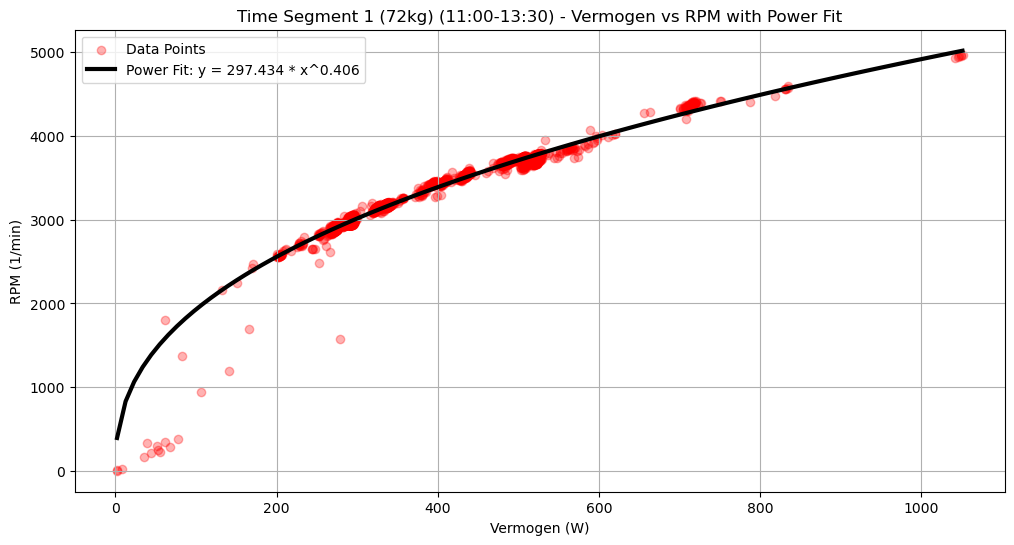

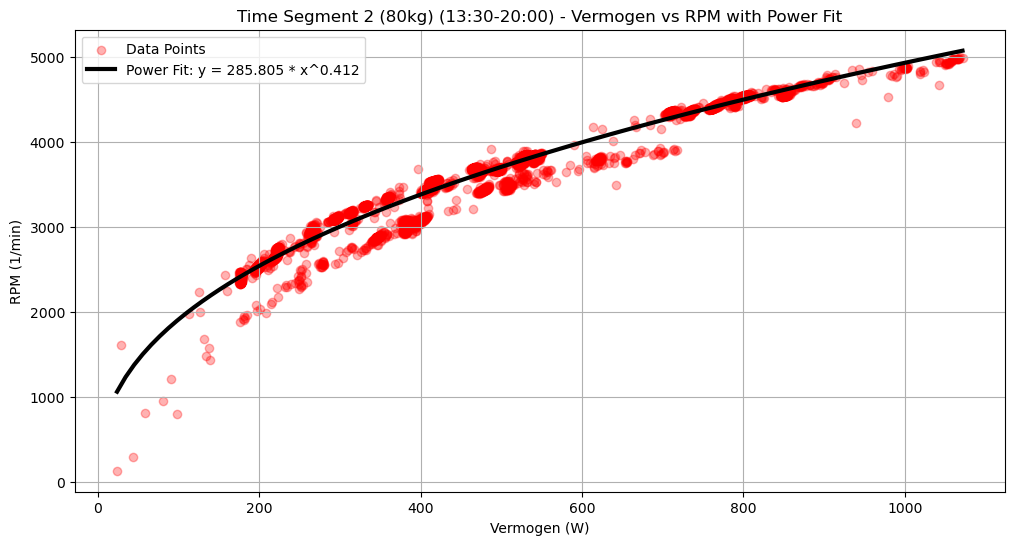

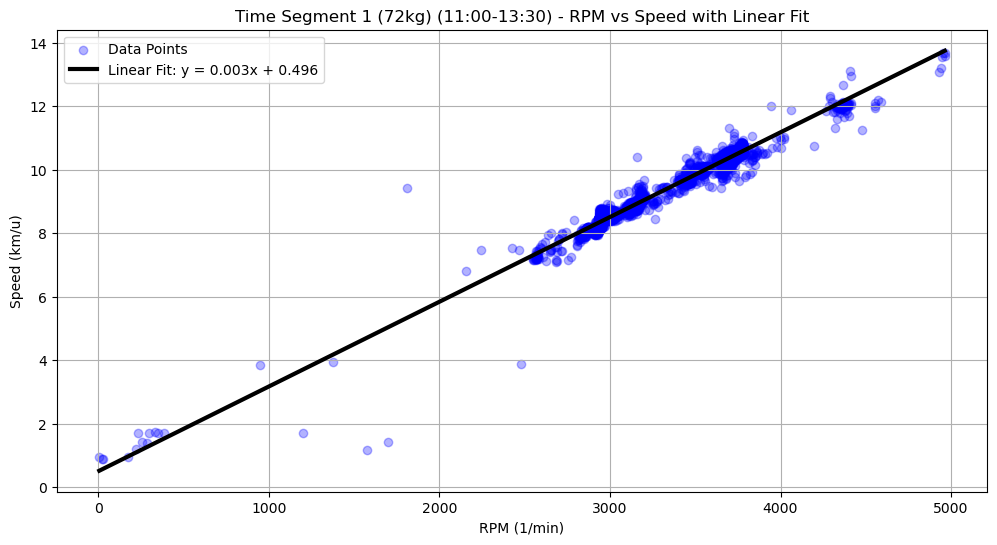

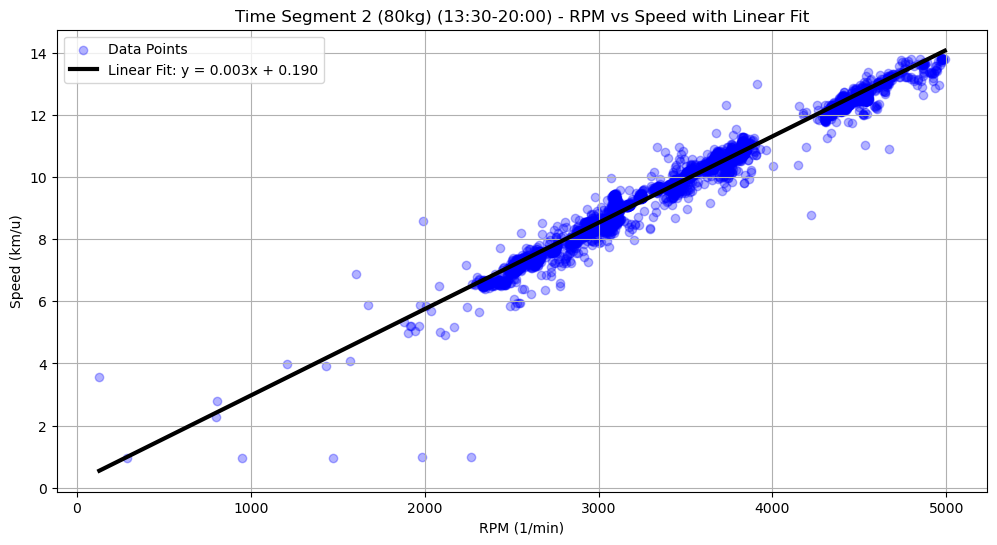

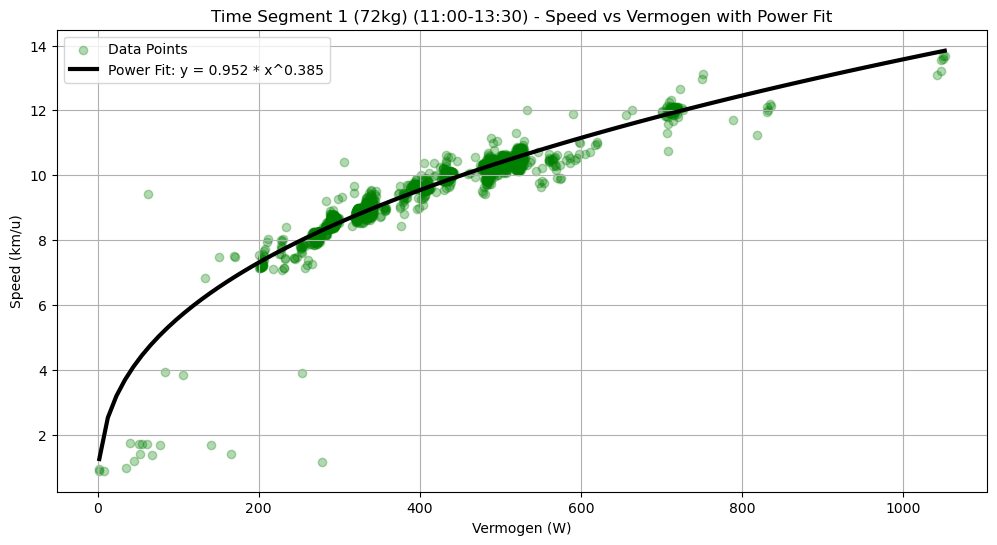

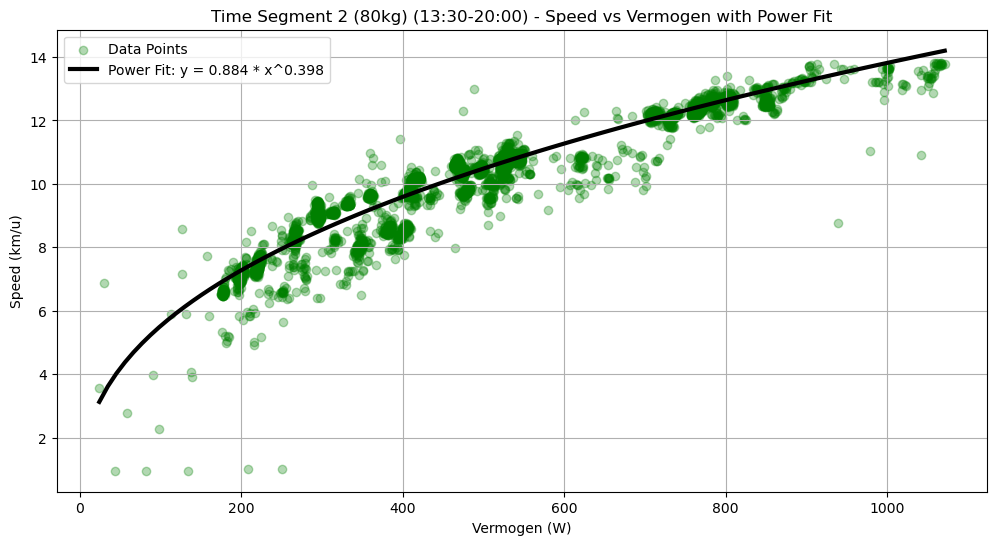

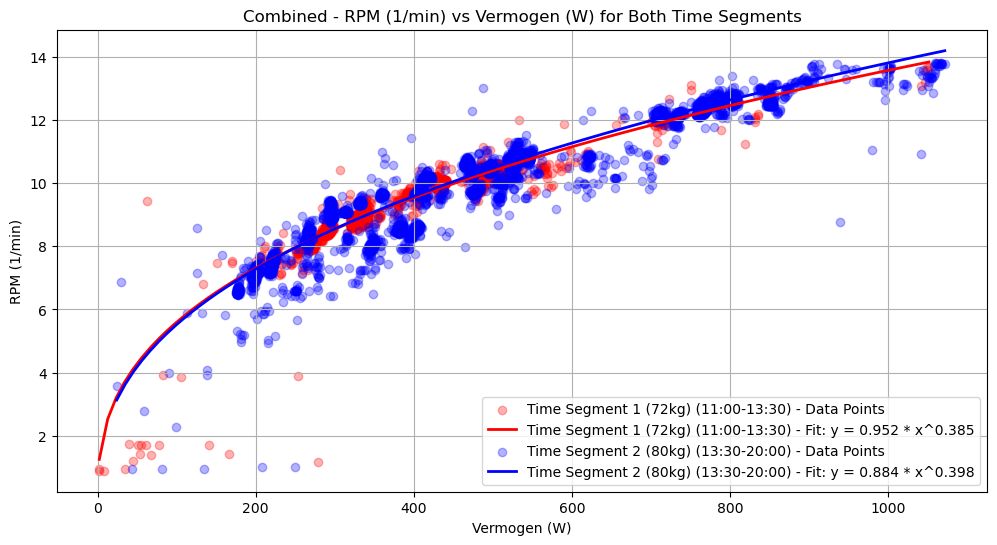

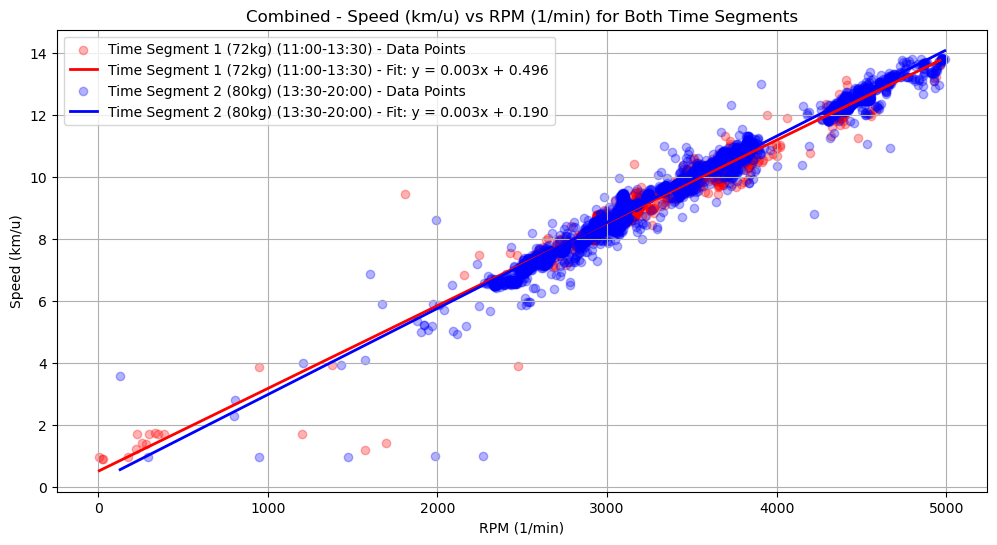

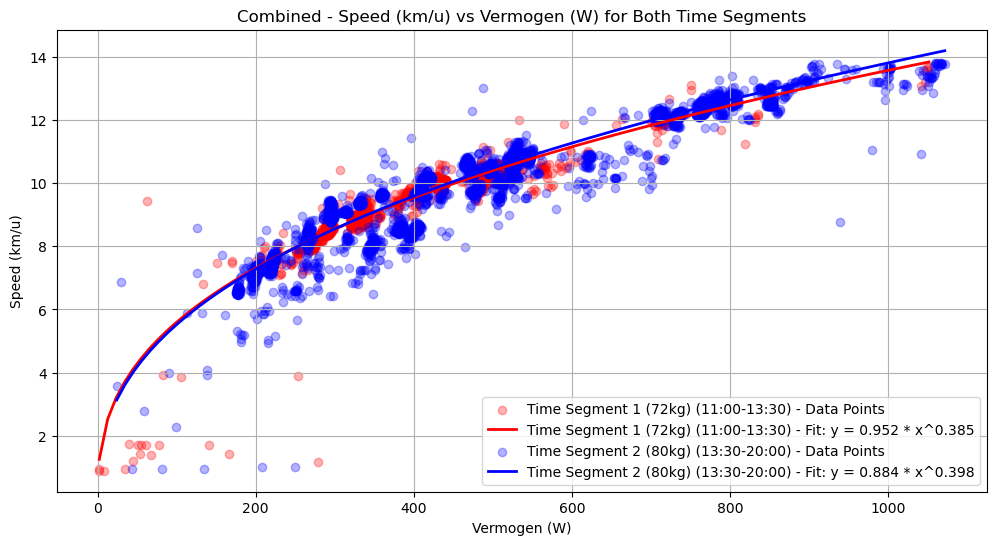

In [114]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# Define models for fitting
def power_model(x, b, a):
    return b * x**a

def linear_model(x, m, c):
    return m * x + c

# Function to plot Vermogen vs RPM with a power model fit
def plot_vermogen_vs_rpm_with_fit(df, title_prefix):
    vermogen = df['2_VESC input vermogen (W)'].to_numpy()
    rpm = df['2_Current RPM of motor shaft (1/min)'].to_numpy()
    
    # Fit the power model
    popt, _ = curve_fit(power_model, vermogen, rpm, maxfev=10000)
    b, a = popt
    
    # Generate fit line
    vermogen_fit = np.linspace(min(vermogen), max(vermogen), 100)
    rpm_fit = power_model(vermogen_fit, b, a)
    
    # Plot the data and the fit
    plt.figure(figsize=(12, 6))
    plt.scatter(vermogen, rpm, alpha=0.3, color='red', label='Data Points')
    plt.plot(vermogen_fit, rpm_fit, '-', color='black', linewidth=3,
             label=f'Power Fit: y = {b:.3f} * x^{a:.3f}')
    plt.xlabel('Vermogen (W)')
    plt.ylabel('RPM (1/min)')
    plt.title(f'{title_prefix} - Vermogen vs RPM with Power Fit')
    plt.legend()
    plt.grid(True)
    plt.show()

# Function to plot RPM vs Speed with a linear fit
def plot_rpm_vs_speed_with_fit(df, title_prefix):
    rpm = df['2_Current RPM of motor shaft (1/min)'].to_numpy()
    speed = df['1_Snelheid tenopzichte van het water in Kilometers per uur'].to_numpy()
    
    # Fit the linear model
    popt, _ = curve_fit(linear_model, rpm, speed)
    m, c = popt
    
    # Generate fit line
    rpm_fit = np.linspace(min(rpm), max(rpm), 100)
    speed_fit = linear_model(rpm_fit, m, c)
    
    # Plot the data and the fit
    plt.figure(figsize=(12, 6))
    plt.scatter(rpm, speed, alpha=0.3, color='blue', label='Data Points')
    plt.plot(rpm_fit, speed_fit, '-', color='black', linewidth=3,
             label=f'Linear Fit: y = {m:.3f}x + {c:.3f}')
    plt.xlabel('RPM (1/min)')
    plt.ylabel('Speed (km/u)')
    plt.title(f'{title_prefix} - RPM vs Speed with Linear Fit')
    plt.legend()
    plt.grid(True)
    plt.show()

# Function to plot Speed vs Vermogen with power model (corrected axes)
def plot_speed_vs_vermogen_with_fit(df, title_prefix):
    vermogen = df['2_VESC input vermogen (W)'].to_numpy()
    speed = df['1_Snelheid tenopzichte van het water in Kilometers per uur'].to_numpy()
    
    # Fit the power model
    popt, _ = curve_fit(power_model, vermogen, speed, maxfev=10000)
    b, a = popt
    
    # Generate fit line
    vermogen_fit = np.linspace(min(vermogen), max(vermogen), 100)
    speed_fit = power_model(vermogen_fit, b, a)
    
    # Plot the data and the fit
    plt.figure(figsize=(12, 6))
    plt.scatter(vermogen, speed, alpha=0.3, color='green', label='Data Points')
    plt.plot(vermogen_fit, speed_fit, '-', color='black', linewidth=3,
             label=f'Power Fit: y = {b:.3f} * x^{a:.3f}')
    plt.xlabel('Vermogen (W)')
    plt.ylabel('Speed (km/u)')
    plt.title(f'{title_prefix} - Speed vs Vermogen with Power Fit')
    plt.legend()
    plt.grid(True)
    plt.show()

# Function to create combined plots
def plot_combined(df_list, titles, x_label, y_label, plot_type='linear'):
    plt.figure(figsize=(12, 6))
    colors = ['red', 'blue']
    
    for i, df in enumerate(df_list):
        if plot_type == 'linear':
            x = df['2_Current RPM of motor shaft (1/min)'].to_numpy()
            y = df['1_Snelheid tenopzichte van het water in Kilometers per uur'].to_numpy()
            popt, _ = curve_fit(linear_model, x, y)
            x_fit = np.linspace(min(x), max(x), 100)
            y_fit = linear_model(x_fit, *popt)
            plt.scatter(x, y, alpha=0.3, color=colors[i], label=f'{titles[i]} - Data Points')
            plt.plot(x_fit, y_fit, '-', color=colors[i], linewidth=2, label=f'{titles[i]} - Fit: y = {popt[0]:.3f}x + {popt[1]:.3f}')
        elif plot_type == 'power':
            x = df['2_VESC input vermogen (W)'].to_numpy()
            y = df['1_Snelheid tenopzichte van het water in Kilometers per uur'].to_numpy()
            popt, _ = curve_fit(power_model, x, y, maxfev=10000)
            x_fit = np.linspace(min(x), max(x), 100)
            y_fit = power_model(x_fit, *popt)
            plt.scatter(x, y, alpha=0.3, color=colors[i], label=f'{titles[i]} - Data Points')
            plt.plot(x_fit, y_fit, '-', color=colors[i], linewidth=2, label=f'{titles[i]} - Fit: y = {popt[0]:.3f} * x^{popt[1]:.3f}')

    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title(f'Combined - {y_label} vs {x_label} for Both Time Segments')
    plt.legend()
    plt.grid(True)
    plt.show()

# Example of how to create the filtered data frames (make sure to define merged_df1)
# merged_df1_1 = merged_df1[(merged_df1['1_Tijd'] >= 110000) & (merged_df1['1_Tijd'] <= 133000)]
# merged_df1_2 = merged_df1[(merged_df1['1_Tijd'] >= 133000) & (merged_df1['1_Tijd'] <= 200000)]

# Generate individual plots for each time segment with updated titles
plot_vermogen_vs_rpm_with_fit(merged_df1_1, "Time Segment 1 (72kg) (11:00-13:30)")
plot_vermogen_vs_rpm_with_fit(merged_df1_2, "Time Segment 2 (80kg) (13:30-20:00)")

plot_rpm_vs_speed_with_fit(merged_df1_1, "Time Segment 1 (72kg) (11:00-13:30)")
plot_rpm_vs_speed_with_fit(merged_df1_2, "Time Segment 2 (80kg) (13:30-20:00)")

plot_speed_vs_vermogen_with_fit(merged_df1_1, "Time Segment 1 (72kg) (11:00-13:30)")
plot_speed_vs_vermogen_with_fit(merged_df1_2, "Time Segment 2 (80kg) (13:30-20:00)")

# Generate combined plots for comparison
plot_combined([merged_df1_1, merged_df1_2], ["Time Segment 1 (72kg) (11:00-13:30)", "Time Segment 2 (80kg) (13:30-20:00)"], 'Vermogen (W)', 'RPM (1/min)', 'power')
plot_combined([merged_df1_1, merged_df1_2], ["Time Segment 1 (72kg) (11:00-13:30)", "Time Segment 2 (80kg) (13:30-20:00)"], 'RPM (1/min)', 'Speed (km/u)', 'linear')
plot_combined([merged_df1_1, merged_df1_2], ["Time Segment 1 (72kg) (11:00-13:30)", "Time Segment 2 (80kg) (13:30-20:00)"], 'Vermogen (W)', 'Speed (km/u)', 'power')
